In [30]:
# 讀取csv檔案
import pandas as pd

data = pd.read_csv('/kaggle/input/hw4-prob2/HW4_prob2.csv')
#print(data.head())

dataset = data.to_numpy()
print(dataset)

[[ 0.81429051 -0.28298169]
 [-0.5570047  -0.22187428]
 [ 0.04143267 -0.27107438]
 [ 0.99912033 -0.00175722]
 [-0.83672332 -0.59245977]
 [-0.1892675  -0.17110177]
 [ 0.52207116 -0.43688033]
 [-0.33320052 -0.14814817]
 [ 0.3984307  -0.42565242]
 [-0.86035141 -0.64171146]
 [-0.38270485 -0.15131543]
 [ 0.07299951 -0.28744298]
 [-0.73796165 -0.41905064]
 [ 0.06585424 -0.28372572]
 [ 0.36449671 -0.41703657]
 [ 0.40276209 -0.42660039]
 [ 0.45490306 -0.43504955]
 [ 0.74760063 -0.34568799]
 [ 0.66753527 -0.39771252]
 [-0.78747356 -0.49961573]
 [-0.09708695 -0.20472812]
 [-0.1292108  -0.19172569]
 [ 0.35704627 -0.41487666]
 [ 0.61499441 -0.4194497 ]
 [ 0.06475913 -0.28315642]
 [ 0.15108517 -0.32780049]
 [-0.95780029 -0.87911337]
 [ 0.35905158 -0.41546708]
 [-0.47724006 -0.17701477]
 [-0.94066542 -0.8332293 ]
 [ 0.9685854  -0.0601463 ]
 [ 0.28077011 -0.38795939]
 [-0.18558449 -0.17220998]
 [-0.19254897 -0.17013306]
 [-0.61036285 -0.26534057]
 [ 0.14289497 -0.32363446]
 [ 0.41637273 -0.42934295]
 

In [31]:
# 定義生成器跟鑑別器
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 生成器
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
        nn.Linear(input_dim, 128),
        nn.ReLU(),
        nn.Linear(128, output_dim),
        nn.Tanh()
        )
    def forward(self, x):
        return self.model(x)

# 鑑別器
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
        nn.Linear(input_dim, 128),
        nn.ReLU(),
        nn.Linear(128, 1),
        nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

In [32]:
# 訓練模型
# 設置參數
input_size = 2
output_size = 2
num_epochs = 10000
batch_size = 50
lr = 0.001

# 初始化
generator = Generator(input_size, output_size)
discriminator = Discriminator(input_size)

# 定義損失函數
criterion = nn.BCELoss()

# 定義優化器
g_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr)

# 原本的資料轉成tensor向量
real_data = torch.tensor(dataset, dtype=torch.float32)

# 訓練gan
for epoch in range(num_epochs):
    # 生成label
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)
    
    # 真實資料的損失
    outputs = discriminator(real_data)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs
    
    # 生成假資料
    z = torch.randn(batch_size, input_size)
    fake_data = generator(z)
    outputs = discriminator(fake_data)
    
    # 計算鑑別器對假資料的loss
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs
    
    # 鑑別器總loss
    d_loss = d_loss_real + d_loss_fake
    
    # 更新鑑別器的嵾數
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()
    
    # 訓練生成器
    z = torch.randn(batch_size, input_size)
    fake_data = generator(z)
    outputs = discriminator(fake_data)
    
    # 計算生成器的loss
    g_loss = criterion(outputs, real_labels)
    
    # 更新生成器的嵾數
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()
    
    # 每1000次打印訓練數據
    if (epoch+1) % 1000 == 0:
        print('Epoch [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
              .format(epoch+1, num_epochs, d_loss.item(), g_loss.item(), 
                      real_score.mean().item(), fake_score.mean().item()))

Epoch [1000/10000], d_loss: 1.3753, g_loss: 0.6685, D(x): 0.52, D(G(z)): 0.51
Epoch [2000/10000], d_loss: 1.1420, g_loss: 1.0071, D(x): 0.52, D(G(z)): 0.37
Epoch [3000/10000], d_loss: 1.3861, g_loss: 0.6862, D(x): 0.50, D(G(z)): 0.50
Epoch [4000/10000], d_loss: 1.3820, g_loss: 0.6963, D(x): 0.50, D(G(z)): 0.50
Epoch [5000/10000], d_loss: 1.3824, g_loss: 0.6903, D(x): 0.50, D(G(z)): 0.50
Epoch [6000/10000], d_loss: 1.3765, g_loss: 0.6961, D(x): 0.49, D(G(z)): 0.49
Epoch [7000/10000], d_loss: 1.3758, g_loss: 0.7032, D(x): 0.50, D(G(z)): 0.49
Epoch [8000/10000], d_loss: 1.3843, g_loss: 0.6983, D(x): 0.50, D(G(z)): 0.50
Epoch [9000/10000], d_loss: 1.3853, g_loss: 0.6901, D(x): 0.50, D(G(z)): 0.50
Epoch [10000/10000], d_loss: 1.3815, g_loss: 0.6934, D(x): 0.50, D(G(z)): 0.50


Generated Data:
[[-0.36406457 -0.1826429 ]
 [ 0.9999976  -0.00310827]
 [ 0.48352665 -0.44102043]
 [-0.13169745 -0.21451825]
 [ 0.5352682  -0.4373178 ]
 [ 0.40296635 -0.4212648 ]
 [-0.1612027  -0.19276756]
 [ 0.22595283 -0.35363483]
 [ 0.15606785 -0.32058662]
 [ 0.6982868  -0.38290152]
 [-0.09575531 -0.21743394]
 [ 0.1808725  -0.33189294]
 [ 0.12667564 -0.3088146 ]
 [ 0.27692726 -0.36988702]
 [-0.20192501 -0.18954627]
 [-0.79020345 -0.5551234 ]
 [-0.05273973 -0.24411441]
 [ 0.6916781  -0.38641205]
 [-0.07257475 -0.2318661 ]
 [ 0.87322664 -0.24206772]
 [ 0.38636777 -0.42003566]
 [-0.23824711 -0.1731719 ]
 [-0.5655181  -0.25037727]
 [-0.03591857 -0.24459507]
 [ 0.44631487 -0.43731472]
 [-0.09704924 -0.22345361]
 [-0.96096027 -0.8454748 ]
 [-0.22553003 -0.17805989]
 [-0.5673749  -0.25158417]
 [ 0.9902436  -0.02537044]
 [ 0.27311805 -0.36755294]
 [-0.49253902 -0.21485199]
 [-0.29920003 -0.19022445]
 [-0.22779965 -0.17679882]
 [-0.03293413 -0.2459225 ]
 [-0.17184861 -0.19558199]
 [-0.2440275

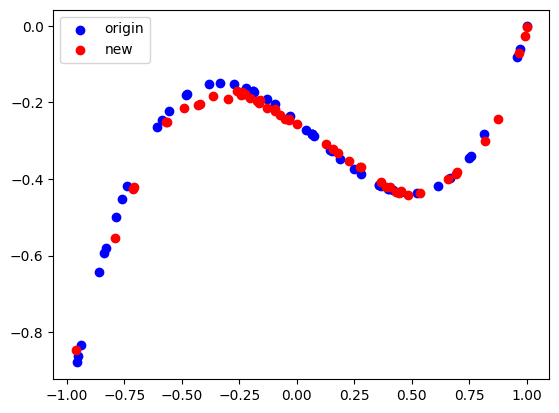

In [34]:
# 生成新資料
z = torch.randn(50, input_size)
generated_data = generator(z).detach().numpy()

# 印出生成資料
print("Generated Data:")
print(generated_data)

# 繪製分布圖
plt.scatter(dataset[:, 0], dataset[:, 1], label='origin', color='blue')
plt.scatter(generated_data[:, 0], generated_data[:, 1], label='new', color='red')
plt.legend()
plt.show()